# Homework #7

Carina Cheng

## Counting objects

In class, we saw how to count the number of objects in a microscopy image.  Here, we will repeat that exercise, but make use of some of the algorithms in `scikit-image` to segment the image, and then to determine properties of the resulting objects.

As input, use the image `skimage.data.coins`.  Segment the image, and then calculate the area and eccentricity of each coin.

There are various ways to do this.  One would be:

1. Equalize the input image (see `skimage.exposure`)
2. Threshold the image (`skimage.filters.otsu`)
3. Remove objects touching the boundary (`skimage.segmentation.clear_border`)
4. Apply morphological closing (`skimage.morphology.closing`)
5. Remove small objects (`skimage.measure.regionprops`).
   Visualize the results if you want with `skimage.color.label2rgb`.
7. Calculate the area and eccentricity of each coin, and display the
   original image with this information on it (`matplotlib.pyplot.text` or `matplotlib.pyplot.annotate`)

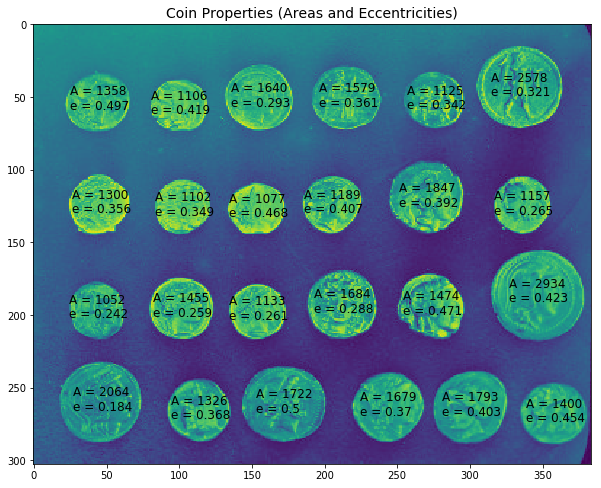

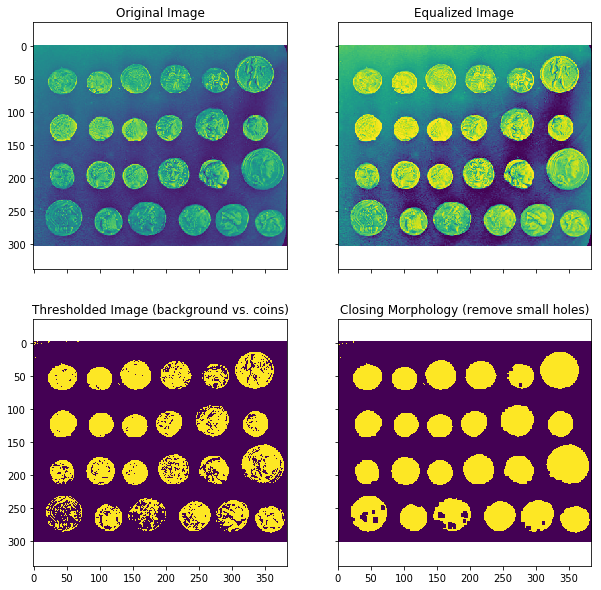

In [1]:
%matplotlib inline
from skimage import data
from skimage import exposure
from skimage import filters
from skimage import segmentation
from skimage import morphology
from skimage import measure
from skimage import color
from skimage.measure import label
import matplotlib.pyplot as plt
import numpy as np

# Load image
image = data.coins()

# Equalize
image_eq = exposure.equalize_hist(image)

# Threshold
thresh = filters.threshold_otsu(image_eq)
thresh += 0.25 # need to increase threshold to remove all the background
coins = (image_eq >= thresh)
background = (image_eq < thresh)
image_thresh = coins

# Remove objects touching boundaries
labels_clear = segmentation.clear_border(coins)
image_bound = image_thresh * labels_clear

# Morphological closing
image_close = morphology.closing(image_bound, morphology.square(5))

# Find coin regions
labels = label(image_close)
regions = measure.regionprops(labels)
image_label_overlay = color.label2rgb(labels, image=image_close)
#plt.imshow(image_label_overlay)
#plt.show()

# Set-up plot that will contain original image and information
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image) # original image
for region in regions: 
    if region.area > 100: # only if a coin region (large regions)
        ax.text((region.bbox[3]+region.bbox[1])/2 - 20,(region.bbox[2]+region.bbox[0])/2 - 5,
                'A = '+str(region.area), fontsize=12)
        ax.text((region.bbox[3]+region.bbox[1])/2 - 20,(region.bbox[2]+region.bbox[0])/2 + 5,
                'e = '+str(np.round(region.eccentricity,3)), fontsize=12)
ax.set_title("Coin Properties (Areas and Eccentricities)", fontsize=14)
plt.show()
        
# Plot different stages of image processing
f, ((ax1, ax2), (ax3, ax4))  = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(10,10))
ax1.imshow(image)
ax1.set_title("Original Image")
ax2.imshow(image_eq)
ax2.set_title("Equalized Image")
ax3.imshow(image_thresh)
ax3.set_title("Thresholded Image (background vs. coins)")
ax4.imshow(image_close)
ax4.set_title("Closing Morphology (remove small holes)")
plt.show()

## Panorama stitching

One of the scikit-image tutorials shows [how to do panorama stitching](https://github.com/scikit-image/skimage-tutorials/blob/master/lectures/solutions/adv3_panorama-stitching-solution.ipynb).

Take 3 or 4 overlapping photos of your own, and use the procedure described to stitch your own panorama.

## Extra: Image Stacking

Reprocess one of the datasets from http://www.rawastrodata.com/.  See http://www.rawastrodata.com/pages/typesofimages.html for a description of the different kind of images.